# MODEL1 (ARIMA)

# Importing libraries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
Data=pd.read_csv("Amazon Product Listings October 2020 Train.csv")
Data.describe()

,Mrp,Price,Purchases
count,25530.000000,25559.000000,25999.000000
mean,2547.666541,1956.150188,28.820416
std,3132.067982,2068.645083,16.347306
min,9.000000,7.000000,1.000000
25%,701.000000,595.000000,15.000000
50%,1578.000000,1216.000000,29.000000
75%,3201.000000,2494.000000,43.000000
max,186616.000000,10925.000000,57.000000


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unique ID              25999 non-null  object 
 1   Date                   25999 non-null  object 
 2   Time Stamp             25999 non-null  object 
 3   Site Name              25999 non-null  object 
 4   Category               25981 non-null  object 
 5   Product Title          25978 non-null  object 
 6   Product Description    24706 non-null  object 
 7   Brand                  25708 non-null  object 
 8   Pack Size Or Quantity  5619 non-null   object 
 9   Mrp                    25530 non-null  float64
 10  Price                  25559 non-null  float64
 11  Offers                 25616 non-null  object 
 12  Combo Offers           27 non-null     object 
 13  Stock Availibility     25999 non-null  object 
 14  Image Urls             25978 non-null  object 
 15  Pu

In [5]:
Data

,Unique ID,Date,Time Stamp,Site Name,Category,Product Title,Product Description,Brand,Pack Size Or Quantity,Mrp,Price,Offers,Combo Offers,Stock Availibility,Image Urls,Purchases
0,f0b68a06debc9253226d6a029b065f38,09-10-2020,04:48:39,Amazon In,Make up,Homely 100pcs/bag Japan Rough Triangle Metal ...,"Item Type: Rhinestone & Decoration, Weight: 5g...",Homely,NaN,1017.0,678.0,33.33%,NaN,YES,https://images-na.ssl-images-amazon.com/images...,49.0
1,3100ab4692077d37b288e1e2da1bb601,09-10-2020,08:09:29,Amazon In,Make up,Fashlady™ F019: 2 Folhas De Lavanda Flor Etiq...,"Tipo de item: adesivo & decalque, estilo: flow...",FashladyTM,NaN,1949.0,1299.0,33.35%,NaN,YES,https://images-na.ssl-images-amazon.com/images...,22.0
2,b8f4d3a59d5c366d3ccaa94760887d78,09-10-2020,12:01:44,Amazon In,Make up,Fashlady™ 1 Sheet Nailmad Diamond Heart Nail ...,"Item type: sticker & decal, quantity: 1 sheet,...",FashladyTM,NaN,1949.0,1299.0,33.35%,NaN,YES,https://images-na.ssl-images-amazon.com/images...,12.0
3,2e0dfeb33b2484a154693a1353d716f5,17-10-2020,19:06:57,Amazon In,Bath & Shower,Fa Coconut Water Shower Gel - 250ml,Fa Coconut Water Shower Gel - 250ml\n\t\t\t\t ...,Fa,499 g,595.0,495.0,16.81%,NaN,YES,https://images-na.ssl-images-amazon.com/images...,45.0
4,1f41d00d574e35e0636798d24051005c,09-10-2020,01:19:29,Amazon In,Make up,Veena OTwoO Brush Set Soft And Easy To Wear P...,Item type makeup tool kit brand name otwoo qua...,Veena,NaN,1506.4,1065.0,29.30%,NaN,YES,https://images-na.ssl-images-amazon.com/images...,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning and preparing time series data

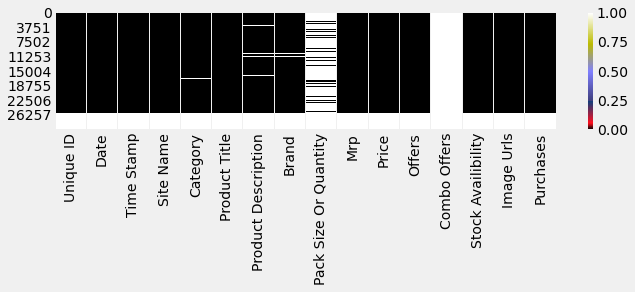

In [6]:
#visualising the missing Values using heatmap
plt.figure(figsize=(10,2))
sns.heatmap(Data.isnull(),cmap="gist_stern")

In [7]:
Data=Data.drop(['Combo Offers','Pack Size Or Quantity'],axis=1)

In [8]:
Data.isnull().sum()

Unique ID              4001
Date                   4001
Time Stamp             4001
Site Name              4001
Category               4019
Product Title          4022
Product Description    5294
Brand                  4292
Mrp                    4470
Price                  4441
Offers                 4384
Stock Availibility     4001
Image Urls             4022
Purchases              4001
dtype: int64

In [9]:
Dat=Data.dropna()
Dat.isnull().sum()

Unique ID              0
Date                   0
Time Stamp             0
Site Name              0
Category               0
Product Title          0
Product Description    0
Brand                  0
Mrp                    0
Price                  0
Offers                 0
Stock Availibility     0
Image Urls             0
Purchases              0
dtype: int64

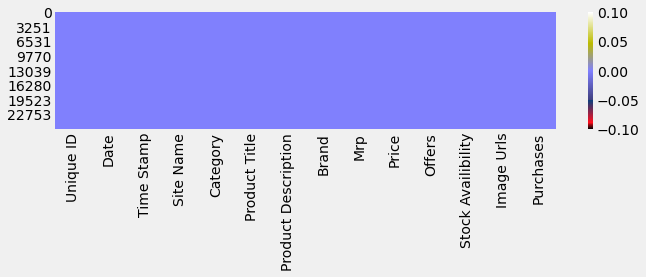

In [10]:
#Visualising the missing values after dropping the variables
plt.figure(figsize=(10,2))
sns.heatmap(Dat.isnull(),cmap="gist_stern")

Hence missing Values are dropped

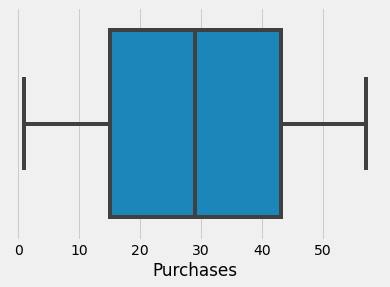

In [11]:
sns.boxplot(x=Dat["Purchases"])

In [12]:
Dat=Data.drop(['Unique ID', 'Time Stamp', 'Site Name', 'Category',
       'Product Title', 'Product Description', 'Brand', 'Mrp', 'Price', 'Offers',
       'Stock Availibility', 'Image Urls'],axis=1)

In [13]:
Dat['Date'] = pd.to_datetime(Data['Date']+ ' ' + Data['Time Stamp'])
Dat['Date'] = pd.to_datetime(Dat['Date'], format='%d-%m-%Y h:m:s')


In [14]:
Dat['hour'] = Dat['Date'].apply(lambda x:x.hour)
Dat['dayofweek'] = Dat['Date'].apply(lambda x:x.dayofweek)
Dat['quarter'] = Dat['Date'].apply(lambda x:x.quarter)
Dat['month'] = Dat['Date'].apply(lambda x:x.month)
Dat['year'] = Dat['Date'].apply(lambda x:x.year)
Dat['dayofyear'] = Dat['Date'].apply(lambda x:x.dayofyear)

Dat['weekofyear'] = Dat['Date'].apply(lambda x:x.weekofyear)

In [15]:
Dat=Dat.dropna()
Dat

,Date,Purchases,hour,dayofweek,quarter,month,year,dayofyear,weekofyear
0,2020-09-10 04:48:39,49.0,4.0,3.0,3.0,9.0,2020.0,254.0,37.0
1,2020-09-10 08:09:29,22.0,8.0,3.0,3.0,9.0,2020.0,254.0,37.0
2,2020-09-10 12:01:44,12.0,12.0,3.0,3.0,9.0,2020.0,254.0,37.0
3,2020-10-17 19:06:57,45.0,19.0,5.0,4.0,10.0,2020.0,291.0,42.0
4,2020-09-10 01:19:29,38.0,1.0,3.0,3.0,9.0,2020.0,254.0,37.0
...,...,...,...,...,...,...,...,...,...
25994,2020-09-10 03:41:22,40.0,3.0,3.0,3.0,9.0,2020.0,254.0,37.0
25995,2020-09-10 04:00:19,3.0,4.0,3.0,3.0,9.0,2020.0,254.0,37.0
25996,2020-10-18 01:01:38,40.0,1.0,6.0,4.0,10.0,2020.0,292.0,42.0
25997,2020-10-18 02:26:22,2.0,2.0,6.0,4.0,10.0,2020.0,292.0,42.0


In [16]:
Dat

,Date,Purchases,hour,dayofweek,quarter,month,year,dayofyear,weekofyear
0,2020-09-10 04:48:39,49.0,4.0,3.0,3.0,9.0,2020.0,254.0,37.0
1,2020-09-10 08:09:29,22.0,8.0,3.0,3.0,9.0,2020.0,254.0,37.0
2,2020-09-10 12:01:44,12.0,12.0,3.0,3.0,9.0,2020.0,254.0,37.0
3,2020-10-17 19:06:57,45.0,19.0,5.0,4.0,10.0,2020.0,291.0,42.0
4,2020-09-10 01:19:29,38.0,1.0,3.0,3.0,9.0,2020.0,254.0,37.0
...,...,...,...,...,...,...,...,...,...
25994,2020-09-10 03:41:22,40.0,3.0,3.0,3.0,9.0,2020.0,254.0,37.0
25995,2020-09-10 04:00:19,3.0,4.0,3.0,3.0,9.0,2020.0,254.0,37.0
25996,2020-10-18 01:01:38,40.0,1.0,6.0,4.0,10.0,2020.0,292.0,42.0
25997,2020-10-18 02:26:22,2.0,2.0,6.0,4.0,10.0,2020.0,292.0,42.0


# Data Visualisation

In [17]:
temp = Data['Stock Availibility'].value_counts()
temp

YES    25599
NO       400
Name: Stock Availibility, dtype: int64

([<matplotlib.patches.Wedge at 0x25f2b6ca430>,
 [Text(-1.0987153501513884, 0.05314677169604965, 'YES'),
  Text(1.0987153495293933, -0.05314678455469405, 'NO')])

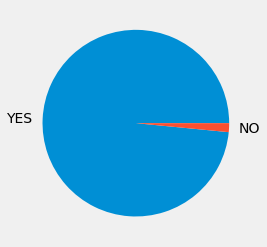

In [18]:
labels=["YES","NO"]
plt.pie(temp,labels=labels) 

In [19]:
#Catagory
print(Data['Category'].value_counts())


Make up                                                                       9550
Skin Care                                                                     7664
Grocery & Gourmet Foods                                                       4025
Hair Care                                                                     1329
Fragrance                                                                      884
Bath & Shower                                                                  864
Baby Bath & Hygiene                                                            203
 Baby | Diapering & Nappy Changing | Diaper Bags                               187
 Baby | Diapering & Nappy Changing | Diapers | Cloth Diapers                   159
 Baby | Baby Care | Bathing | Bath Towels & Wash Cloths                        125
Detergents & Dishwash                                                          122
 Toys & Games | Baby & Toddler Toys | Bath Toys                                118
 Bab

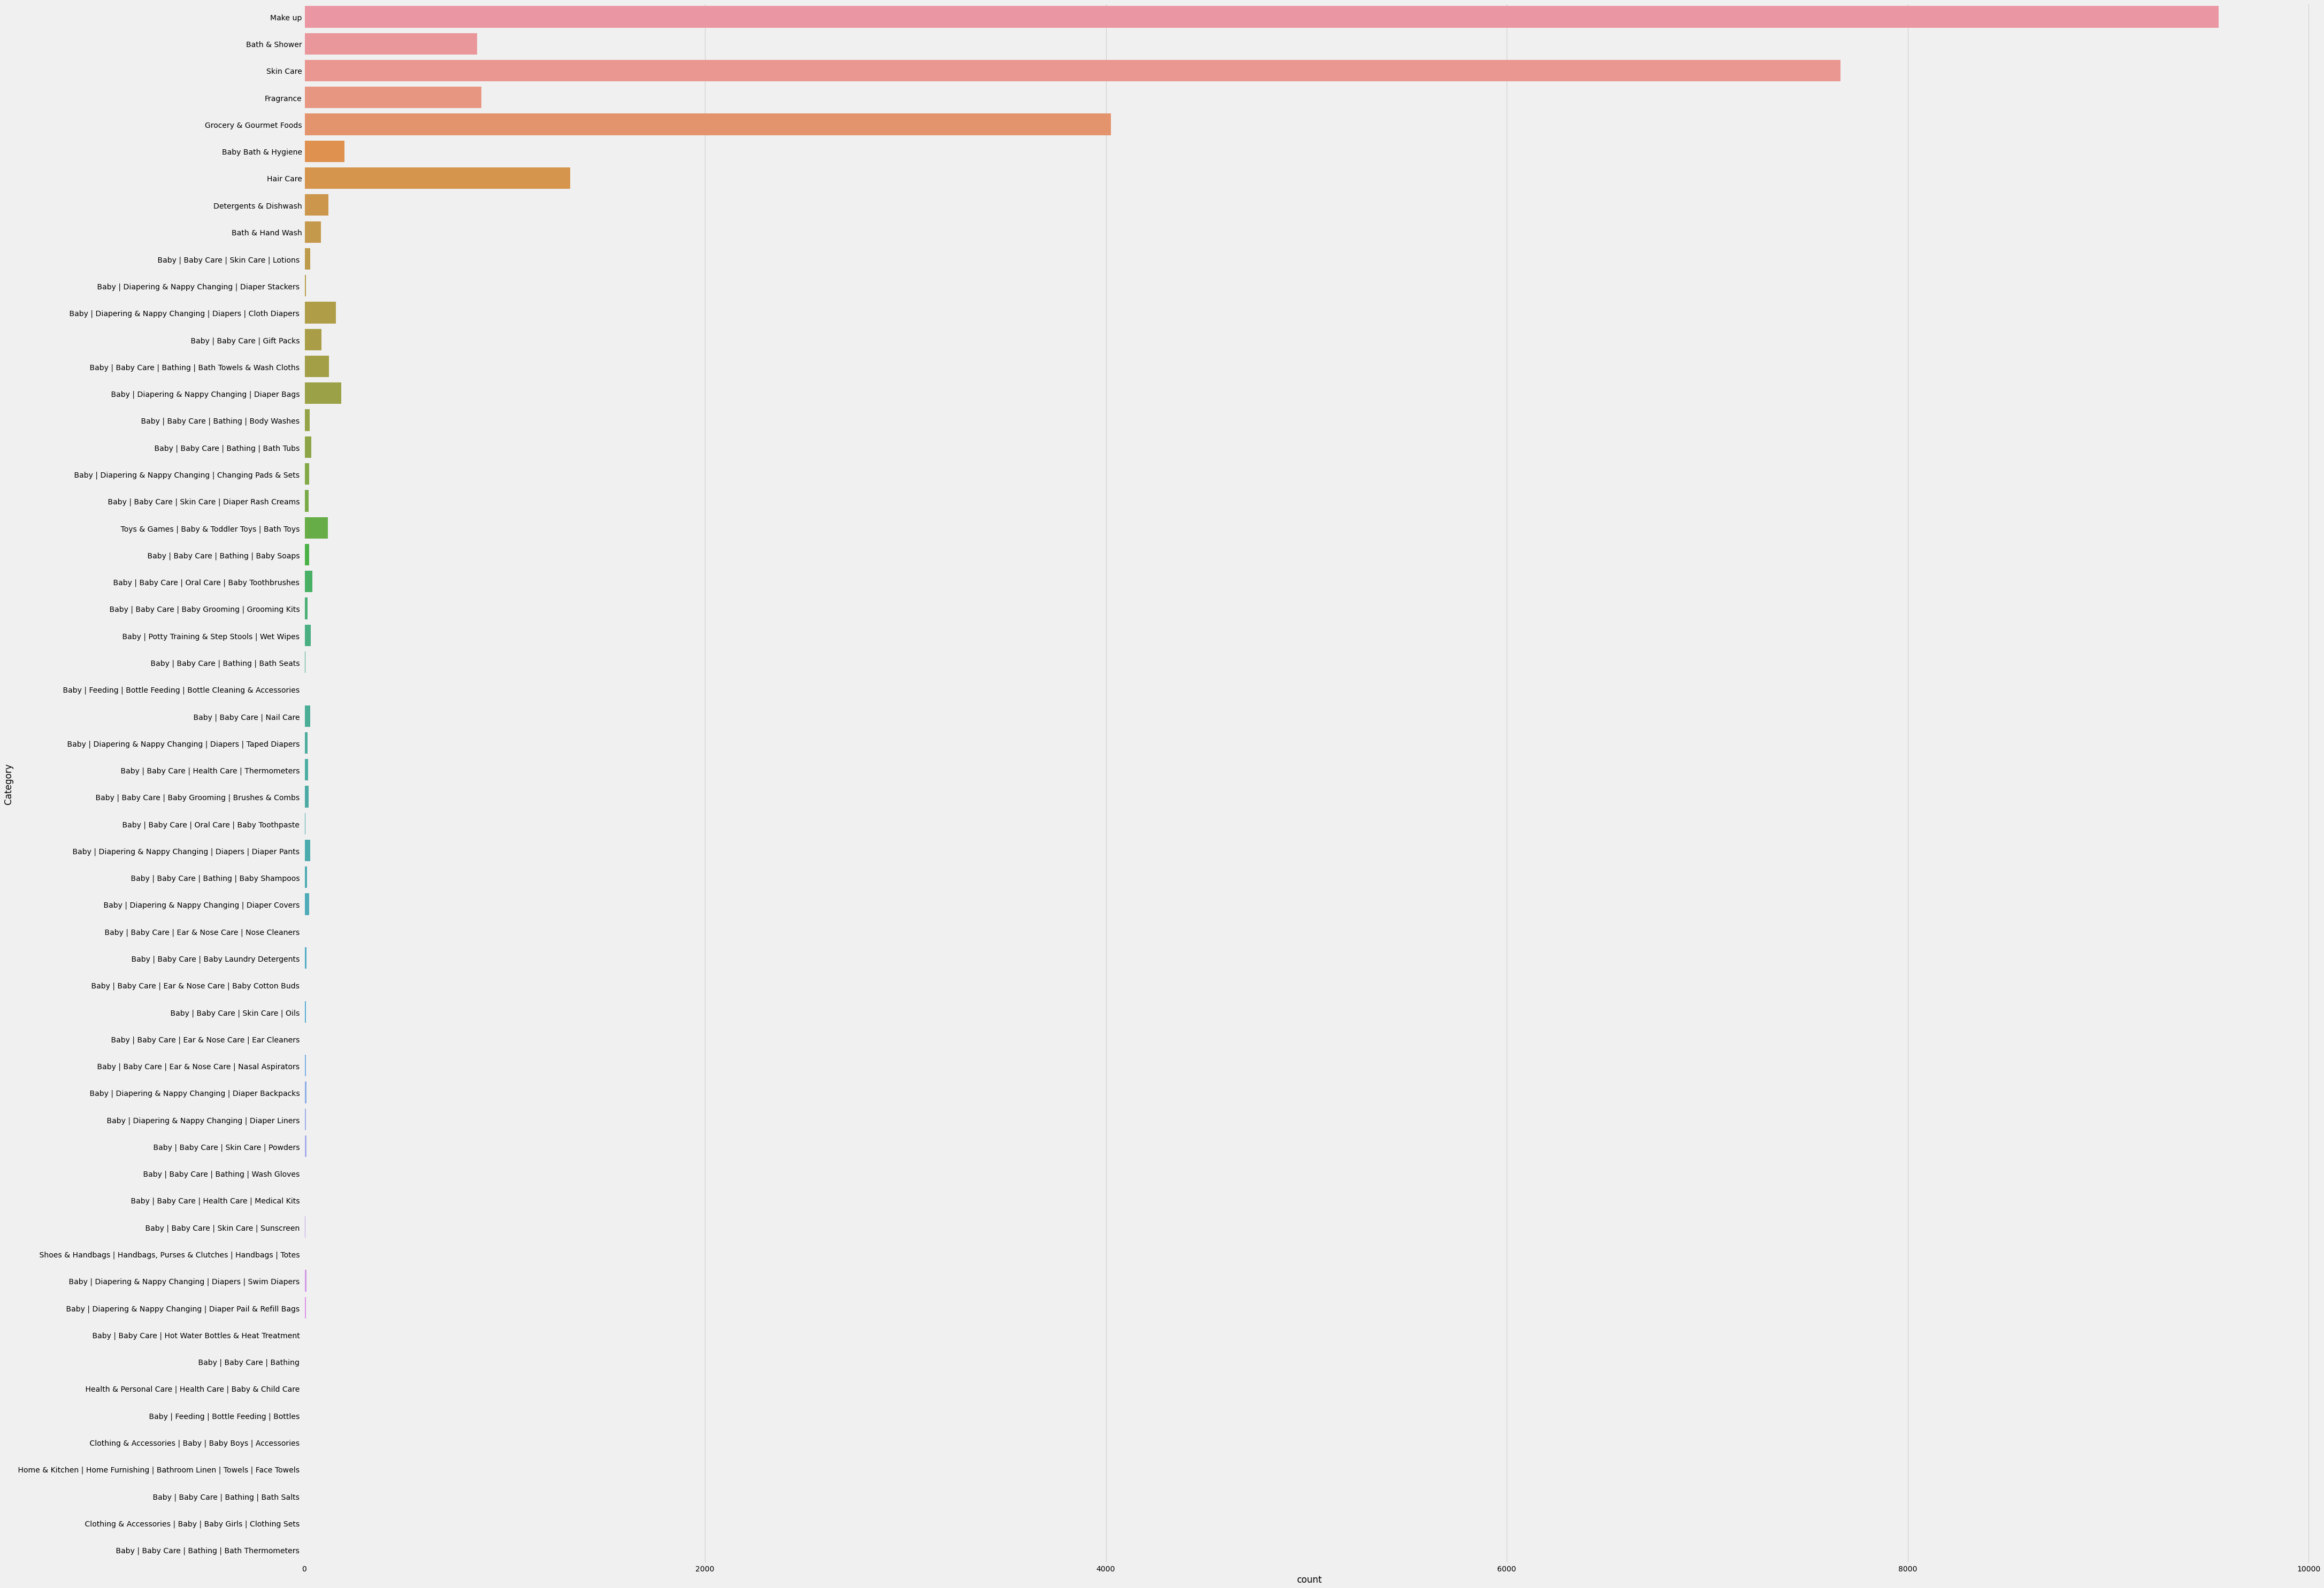

In [20]:
plt.figure(figsize=(60,50))
sns.countplot(y=Data['Category'])
plt.show()

# Feature Engineering

In [21]:
Data1 = Data.drop(['Unique ID', 'Time Stamp', 'Site Name', 'Category',
       'Product Title', 'Product Description', 'Brand',
        'Mrp', 'Price', 'Offers', 
       'Stock Availibility', 'Image Urls'],axis=1)
Data1

,Date,Purchases
0,09-10-2020,49.0
1,09-10-2020,22.0
2,09-10-2020,12.0
3,17-10-2020,45.0
4,09-10-2020,38.0
...,...,...
29995,NaN,NaN
29996,NaN,NaN
29997,NaN,NaN
29998,NaN,NaN


In [22]:
Data.columns

Index(['Unique ID', 'Date', 'Time Stamp', 'Site Name', 'Category',
       'Product Title', 'Product Description', 'Brand', 'Mrp', 'Price',
       'Offers', 'Stock Availibility', 'Image Urls', 'Purchases'],
      dtype='object')

In [23]:
Data2 = Data1.dropna()
Data2

,Date,Purchases
0,09-10-2020,49.0
1,09-10-2020,22.0
2,09-10-2020,12.0
3,17-10-2020,45.0
4,09-10-2020,38.0
...,...,...
25994,09-10-2020,40.0
25995,09-10-2020,3.0
25996,18-10-2020,40.0
25997,18-10-2020,2.0


In [24]:
Data3 = Data2.sort_values(by='Date')
Data3

,Date,Purchases
9206,01-10-2020,26.0
5416,01-10-2020,50.0
1847,01-10-2020,45.0
19555,01-10-2020,25.0
1874,01-10-2020,28.0
...,...,...
11995,18-10-2020,11.0
6077,18-10-2020,4.0
15233,18-10-2020,46.0
6081,18-10-2020,8.0


In [25]:
Data3.sort_index()

,Date,Purchases
0,09-10-2020,49.0
1,09-10-2020,22.0
2,09-10-2020,12.0
3,17-10-2020,45.0
4,09-10-2020,38.0
...,...,...
25994,09-10-2020,40.0
25995,09-10-2020,3.0
25996,18-10-2020,40.0
25997,18-10-2020,2.0


In [26]:
Data4 = Data3.set_index('Date')
Data4

,Purchases
Date,
01-10-2020,26.0
01-10-2020,50.0
01-10-2020,45.0
01-10-2020,25.0
01-10-2020,28.0
...,...
18-10-2020,11.0
18-10-2020,4.0
18-10-2020,46.0


In [27]:
Data5 = Data4.sort_values(['Date'],ignore_index=True)
Data5

,Purchases
0,26.0
1,35.0
2,46.0
3,40.0
4,18.0
...,...
25994,56.0
25995,56.0
25996,18.0
25997,11.0


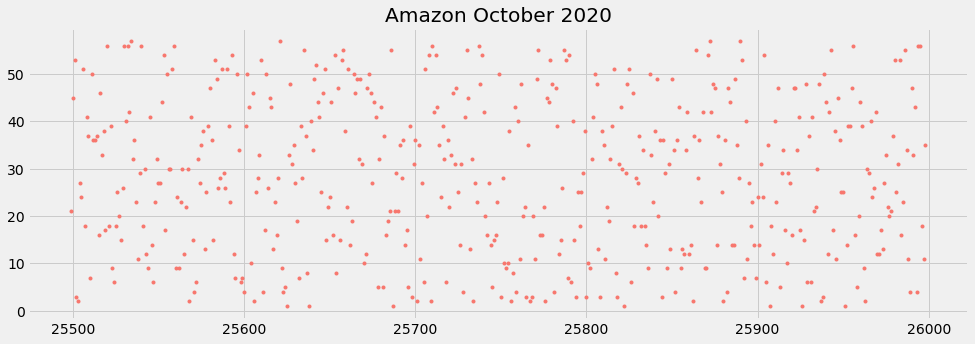

In [28]:
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
Data5['Purchases'].tail(500).plot(style='.', figsize=(15,5), color=color_pal[0], title='Amazon October 2020')
plt.show()

In [29]:
25999*.8

20799.2

In [30]:

Data['Purchases'].min(), Data['Purchases'].max()

(1.0, 57.0)

# TRAIN

In [31]:
train=Data5.iloc[0:20799,:]
train

,Purchases
0,26.0
1,35.0
2,46.0
3,40.0
4,18.0
...,...
20794,24.0
20795,29.0
20796,31.0
20797,24.0


# TEST

In [32]:
test=Data5.iloc[20800:]
test

,Purchases
20800,37.0
20801,14.0
20802,23.0
20803,16.0
20804,55.0
...,...
25994,56.0
25995,56.0
25996,18.0
25997,11.0


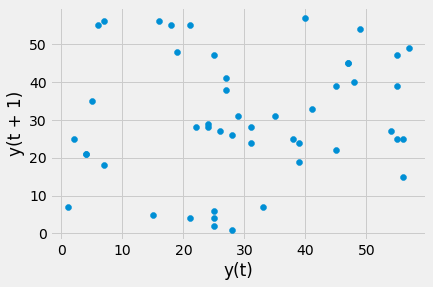

In [33]:
#Lag plot
from pandas.plotting import lag_plot

lag_plot(train['Purchases'].tail(50))

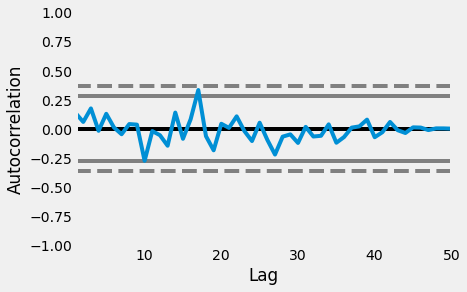

In [34]:
#Autocorrelation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(train['Purchases'].tail(50))

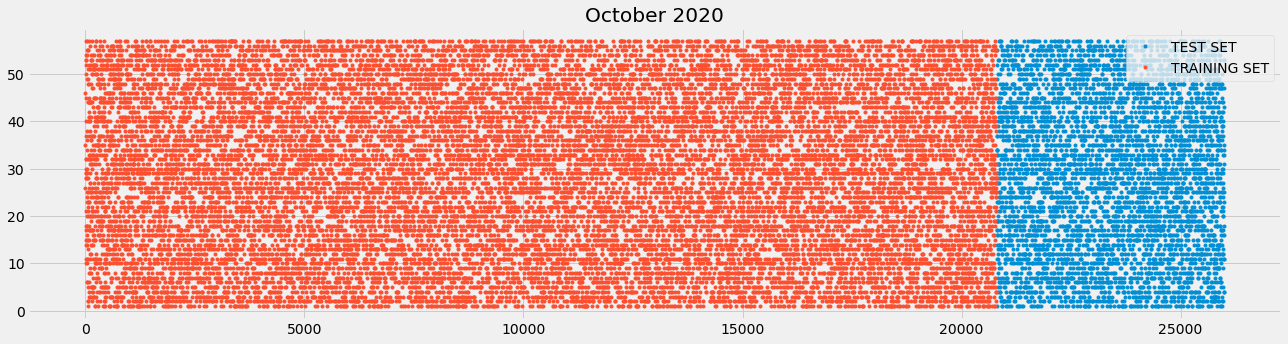

In [35]:
#Plot train and test so you can see where i have split
test \
    .rename(columns={'Purchases': 'TEST SET'}) \
    .join(train.rename(columns={'Purchases': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(20,5), title='October 2020', style='.')
plt.show()

In [36]:
#Data['Date'].value_counts().resample('Y').count().plot.line()

In [37]:
#y = Data['Purchases'].resample('MS').mean()

In [38]:
#y

Text(0.5, 1.0, 'Amazon October 2020 ')

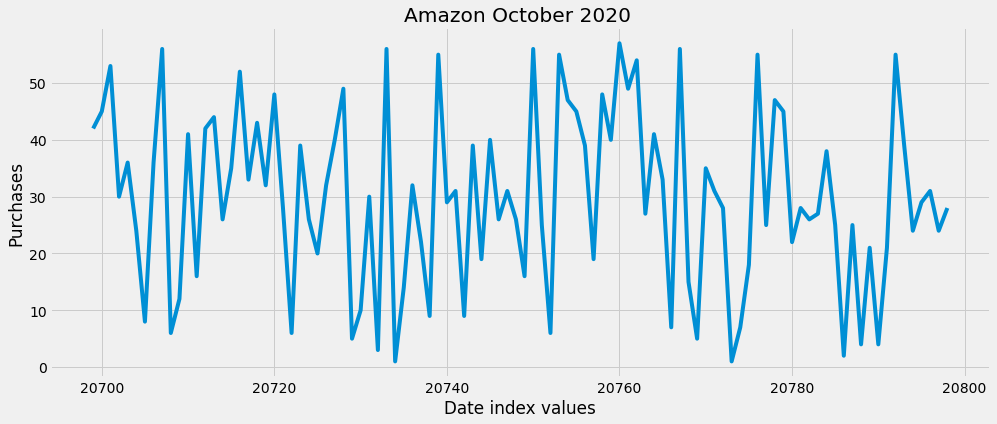

In [39]:
plt.figure(figsize=(15, 6))
plt.grid(True)
plt.xlabel("Date index values")
plt.ylabel("Purchases")
plt.plot(train.tail(100)["Purchases"])
plt.title("Amazon October 2020 ")

# Checking Stationarity

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 432x288 with 0 Axes>

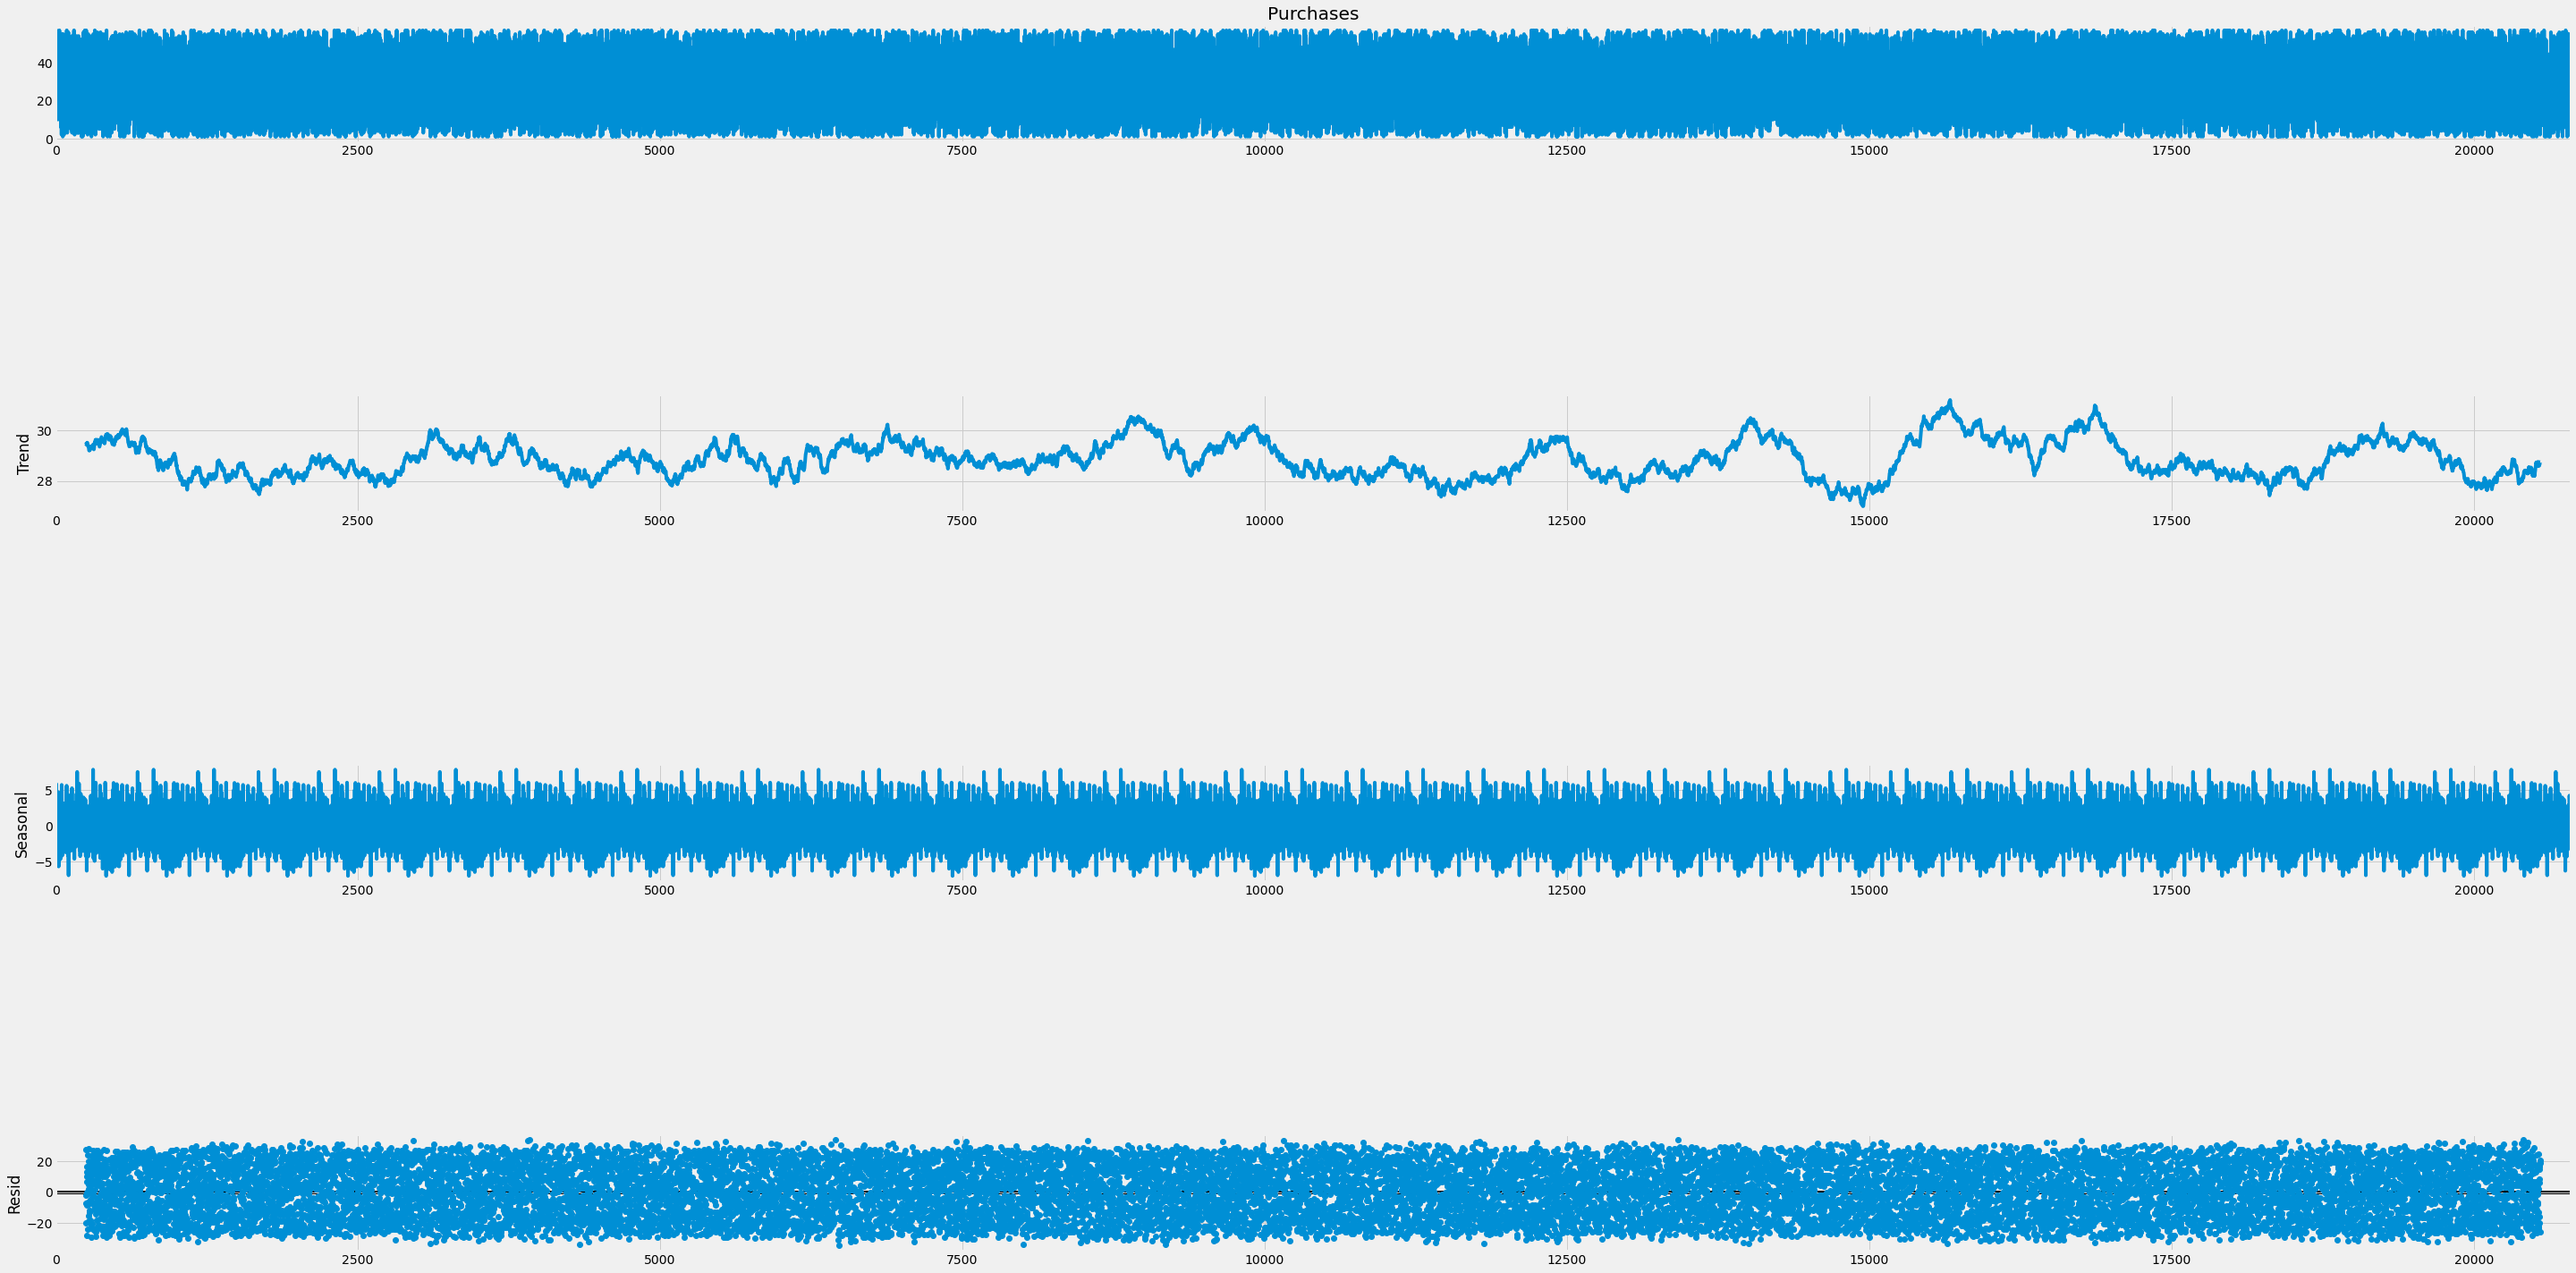

In [41]:
result =sd(train["Purchases"],model="additive",freq=500)
fig=plt.figure()
fig=result.plot()
fig.set_size_inches(50,25)

# Augmented Dickey_Fuller test #adfuller is used to check stationarity or non stationarity

In [42]:

from statsmodels.tsa.stattools import adfuller

In [43]:
dftest=adfuller(train["Purchases"],autolag="AIC")

In [44]:
dftest

(-144.24085866981923,
 0.0,
 0,
 20798,
 {'1%': -3.4306644584710293,
  '5%': -2.861678979886039,
  '10%': -2.5668439751447765},
 174941.30251801293)

In [45]:
dfout=pd.DataFrame(dftest[0:4],index=["teststats","pvalue","lag","Number of Observations used"])

In [46]:
dfout

,0
teststats,-144.240859
pvalue,0.000000
lag,0.000000
Number of Observations used,20798.000000


# Rolling Mean And Rolling Standard Deviation

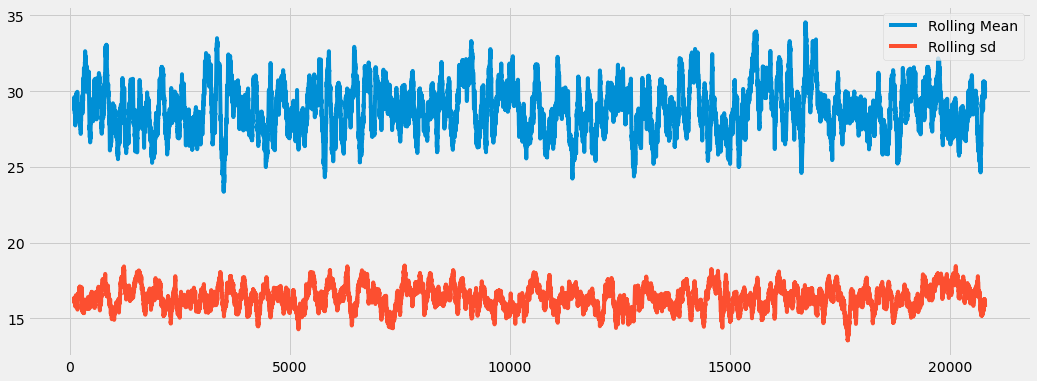

In [47]:
plt.figure(figsize=(16,6))
plt.plot(train['Purchases'].rolling(window=100,center=False).mean(),label='Rolling Mean');
plt.plot(train['Purchases'].rolling(window=100,center=False).std(),label='Rolling sd');
plt.legend();

In [48]:
#from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

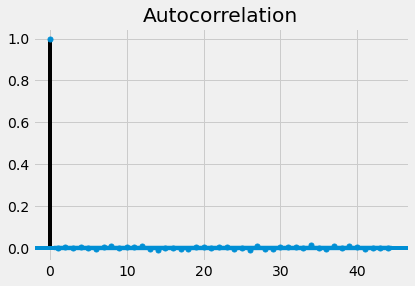

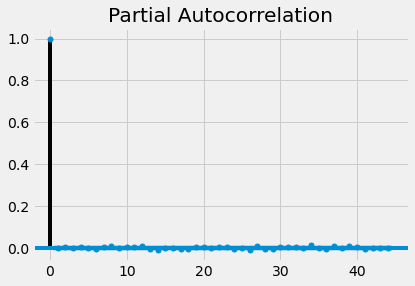

In [49]:
plot_acf(train["Purchases"]),; # for MA q=0
plot_pacf(train["Purchases"]); # for AR p=0

In [50]:
model_arima=ARIMA(train.Purchases,order=(0,0,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

175329.83188085275


In [51]:
prediction=model_arima_fit.forecast(steps=5199)[0]
prediction

array([28.84782922, 28.84782922, 28.84782922, ..., 28.84782922,
       28.84782922, 28.84782922])

In [52]:
test.shape


(5199, 1)

In [53]:
residual=prediction-test.Purchases
residual

20800    -8.152171
20801    14.847829
20802     5.847829
20803    12.847829
20804   -26.152171
           ...    
25994   -27.152171
25995   -27.152171
25996    10.847829
25997    17.847829
25998    -6.152171
Name: Purchases, Length: 5199, dtype: float64

In [54]:
df=pd.DataFrame({"x":range(0,5199),"predicted":prediction,"test":test.Purchases,"residual":residual})

In [55]:
df

,x,predicted,test,residual
20800,0,28.847829,37.0,-8.152171
20801,1,28.847829,14.0,14.847829
20802,2,28.847829,23.0,5.847829
20803,3,28.847829,16.0,12.847829
20804,4,28.847829,55.0,-26.152171
...,...,...,...,...
25994,5194,28.847829,56.0,-27.152171
25995,5195,28.847829,56.0,-27.152171
25996,5196,28.847829,18.0,10.847829
25997,5197,28.847829,11.0,17.847829


In [56]:
from pmdarima.arima import auto_arima
model =auto_arima(train.Purchases, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=8.78 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=204690.877, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=187049.288, Time=0.38 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=196123.597, Time=1.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=182715.511, Time=0.53 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=180797.675, Time=0.74 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=14.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=13.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=175335.082, Time=1.98 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=175333.222, Time=1.78 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=175331.831, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=175329.832, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=175331.832, Time=1.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=175333.831, Time=2.54 sec

Best model:  ARIMA(0,0,

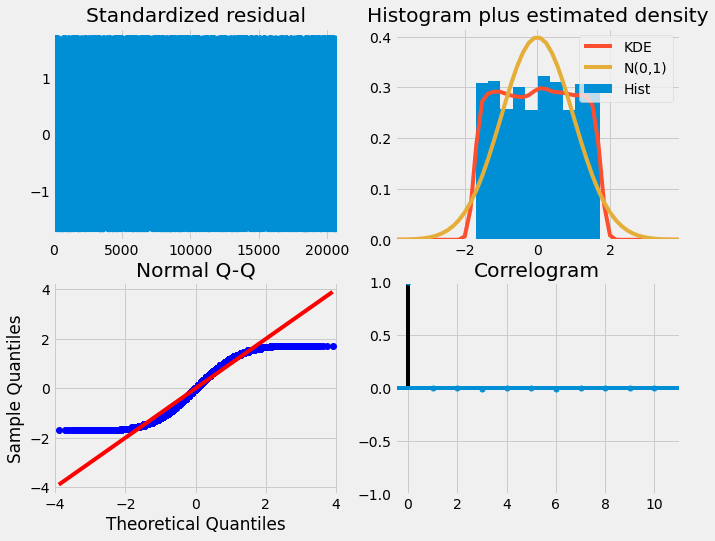

In [57]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [58]:
from statsmodels.tsa.api import ARIMA
modelarima=ARIMA(train,order=(1,0,0))

In [59]:
modelarimafit=modelarima.fit()
modelarimafit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Purchases   No. Observations:                20799
Model:                     ARMA(1, 0)   Log Likelihood              -87662.915
Method:                       css-mle   S.D. of innovations             16.376
Date:                Tue, 23 Mar 2021   AIC                         175331.831
Time:                        14:24:26   BIC                         175355.659
Sample:                             0   HQIC                        175339.612
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              28.8478      0.114    254.109      0.000      28.625      29.070
ar.L1.Purchases    -0.0002      0.007     -0.033      0.974      -0.014       0.013
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1        -4426.5336           +0.0000j         4426.5336            0.5000
-----------------------------------------------------------------------------
"""

In [60]:
test.shape

(5199, 1)

In [61]:
modelarimafit.forecast(steps=5199)

(array([28.8480113 , 28.84781972, 28.84781977, ..., 28.84781977,
        28.84781977, 28.84781977]),
 array([16.37617182, 16.37617224, 16.37617224, ..., 16.37617224,
        16.37617224, 16.37617224]),
 array([[-3.24869568, 60.94471828],
        [-3.24888807, 60.94452752],
        [-3.24888803, 60.94452756],
        ...,
        [-3.24888803, 60.94452756],
        [-3.24888803, 60.94452756],
        [-3.24888803, 60.94452756]]))

In [62]:
df

,x,predicted,test,residual
20800,0,28.847829,37.0,-8.152171
20801,1,28.847829,14.0,14.847829
20802,2,28.847829,23.0,5.847829
20803,3,28.847829,16.0,12.847829
20804,4,28.847829,55.0,-26.152171
...,...,...,...,...
25994,5194,28.847829,56.0,-27.152171
25995,5195,28.847829,56.0,-27.152171
25996,5196,28.847829,18.0,10.847829
25997,5197,28.847829,11.0,17.847829


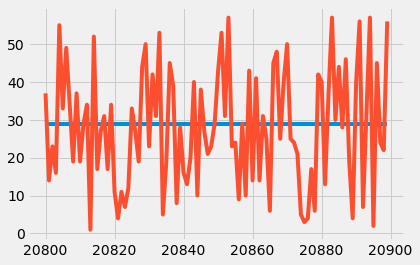

In [63]:
plt.plot(df['predicted'][:100])
plt.plot(df['test'][:100])

In [64]:
import math
from sklearn.metrics import mean_squared_error

In [66]:
testScorearima = math.sqrt(mean_squared_error(test,prediction))
print('Test Score: %.2f RMSE' % (testScorearima))

Test Score: 16.23 RMSE


# MODEL RNN

In [67]:
df1=Data.reset_index()['Purchases']

In [68]:
df1

0        49.0
1        22.0
2        12.0
3        45.0
4        38.0
         ... 
29995     NaN
29996     NaN
29997     NaN
29998     NaN
29999     NaN
Name: Purchases, Length: 30000, dtype: float64

In [69]:
df1=df1.dropna()

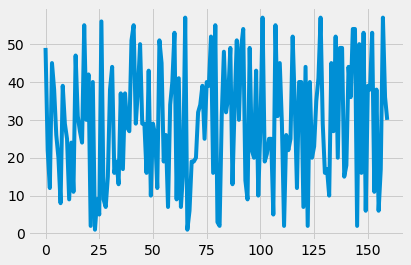

In [70]:
plt.plot(df1.head(160))

# Preprocessing(Scaling)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [72]:
len(df1)

25999

In [73]:
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [74]:
training_size,test_size

(20799, 5200)

In [75]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [76]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_train

array([[0.85714286, 0.375     , 0.19642857, ..., 0.33928571, 0.75      ,
        0.16071429],
       [0.375     , 0.19642857, 0.78571429, ..., 0.75      , 0.16071429,
        0.48214286],
       [0.19642857, 0.78571429, 0.66071429, ..., 0.16071429, 0.48214286,
        1.        ],
       ...,
       [0.33928571, 0.30357143, 0.98214286, ..., 0.89285714, 0.08928571,
        0.66071429],
       [0.30357143, 0.98214286, 0.19642857, ..., 0.08928571, 0.66071429,
        0.57142857],
       [0.98214286, 0.19642857, 0.83928571, ..., 0.66071429, 0.57142857,
        0.03571429]])

In [77]:
print(X_train.shape), print(y_train.shape)

(20698, 100)
(20698,)


(None, None)

In [78]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Model Building

In [79]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [80]:
model=Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 200)          161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          120400    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 312,251
Trainable params: 312,251
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=2,batch_size=10,verbose=1)

Epoch 1/2
2070/2070 [==============================] - 328s 158ms/step - loss: 0.0867 - val_loss: 0.0865
Epoch 2/2
2070/2070 [==============================] - 328s 158ms/step - loss: 0.0860 - val_loss: 0.0851


In [84]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

In [85]:
y_pred[:,0]

array([0.48554736, 0.4854606 , 0.48494112, ..., 0.4880006 , 0.48778248,
       0.48683682], dtype=float32)

In [86]:
 y_pred=scaler.inverse_transform(y_pred)
 

In [87]:
y_pred
y_pred.shape

(5099, 1)

In [88]:
y_pred[0]

array([28.19065], dtype=float32)

In [89]:
import math
from sklearn.metrics import mean_squared_error

In [90]:
ytest=ytest.reshape(-1,1)

In [91]:
ytest=scaler.inverse_transform(ytest)

ytest

In [93]:
ytest.shape

(5099, 1)

In [94]:
residuals=y_pred-ytest

In [95]:
residuals[0]

array([24.19065094])

In [96]:
residuals.shape

(5099, 1)

In [97]:
testScorernn = math.sqrt(mean_squared_error(ytest, y_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScorernn))

Test Score: 16.34 RMSE


# Conclusion

In [99]:
testScorearima

16.231150242969665

In [100]:
testScorernn

16.338057805983365

From the RMSE score of the two models,we conclude that the ARIMA is slightly better than RNN